Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import keras
from keras import layers
keras.backend.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Loading Data

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
image_size = 28*28
image_size

784

In [6]:
X_train = train.drop("label", axis = 1).copy()
X_test = test.copy()
Y_train = train["label"].copy()

In [7]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Data Preprocessing

In [8]:
#Normalize values
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
#Reshape to 28 * 28 so that we can see the images
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

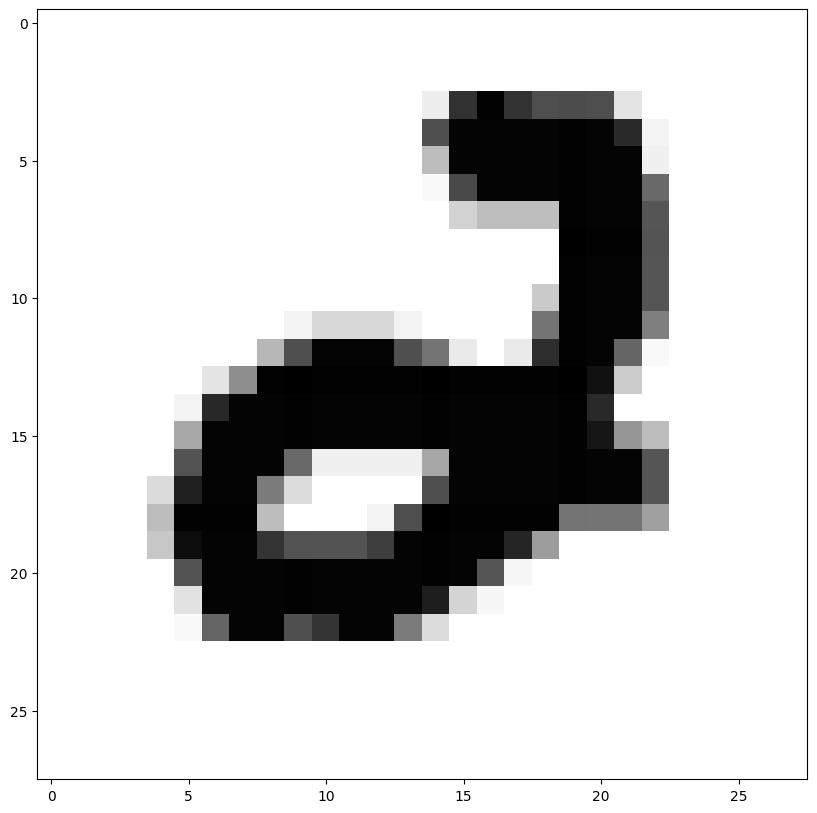

In [10]:
no_images=len(X_train)

# Display random Image
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest') 

# replace random.randint(0,no_images) in code above with a number if you want to see specific image. 
#This dispalys a random image each time

plt.show()

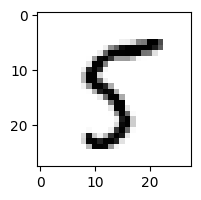

In [11]:
fig, ax = plt.subplots(figsize=(2,2))

plt.imshow(X_train[random.randint(0, no_images), :, :, 0], cmap = "Greys", interpolation = "nearest")

plt.show()

In [12]:
validation_size = 0.2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)

In [13]:
#Get one-hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes = 10)
Y_val = keras.utils.to_categorical(Y_val, num_classes = 10)

In [14]:
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [15]:
model = CNN()

In [16]:
model.compile(optimizer = "Adam", loss = "CategoricalCrossentropy", metrics = "accuracy")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_1 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_1_2 (Conv2D)         (None, 26, 26, 32)        9248      
                                                                 
 bn_1 (BatchNormalization)   (None, 26, 26, 32)        128       
                                                                 
 relu_1 (Activation)         (None, 26, 26, 32)        0         
                                                                 
 mp2d_1 (MaxPooling2D)       (None, 13, 13, 32)        0         
                                                                 
 drop_1 (Dropout)            (None, 13, 13, 32)        0         
                                                                 
 conv2d_2_1 (Conv2D)         (None, 11, 11, 64)        1

In [18]:
training = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 64, epochs = 50, verbose = 1 )

Epoch 1/50
525/525 [==============================] - 64s 111ms/step - loss: 0.2054 - accuracy: 0.9373 - val_loss: 0.0930 - val_accuracy: 0.9706
Epoch 2/50
525/525 [==============================] - 57s 108ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0445 - val_accuracy: 0.9856
Epoch 3/50
525/525 [==============================] - 56s 106ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0481 - val_accuracy: 0.9848
Epoch 4/50
525/525 [==============================] - 54s 103ms/step - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.0431 - val_accuracy: 0.9856
Epoch 5/50
525/525 [==============================] - 55s 104ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0412 - val_accuracy: 0.9868
Epoch 6/50
525/525 [==============================] - 55s 105ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 7/50
525/525 [==============================] - 53s 101ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0318 - val_ac

In [33]:
def predict(model, X, start,end):
    s = int(np.sqrt(end-start))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[start:end])
    for i in range(end-start):
        y_pred = np.argmax(preds[i])
        img = X[start+i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

1/1 [==============================] - 0s 30ms/step


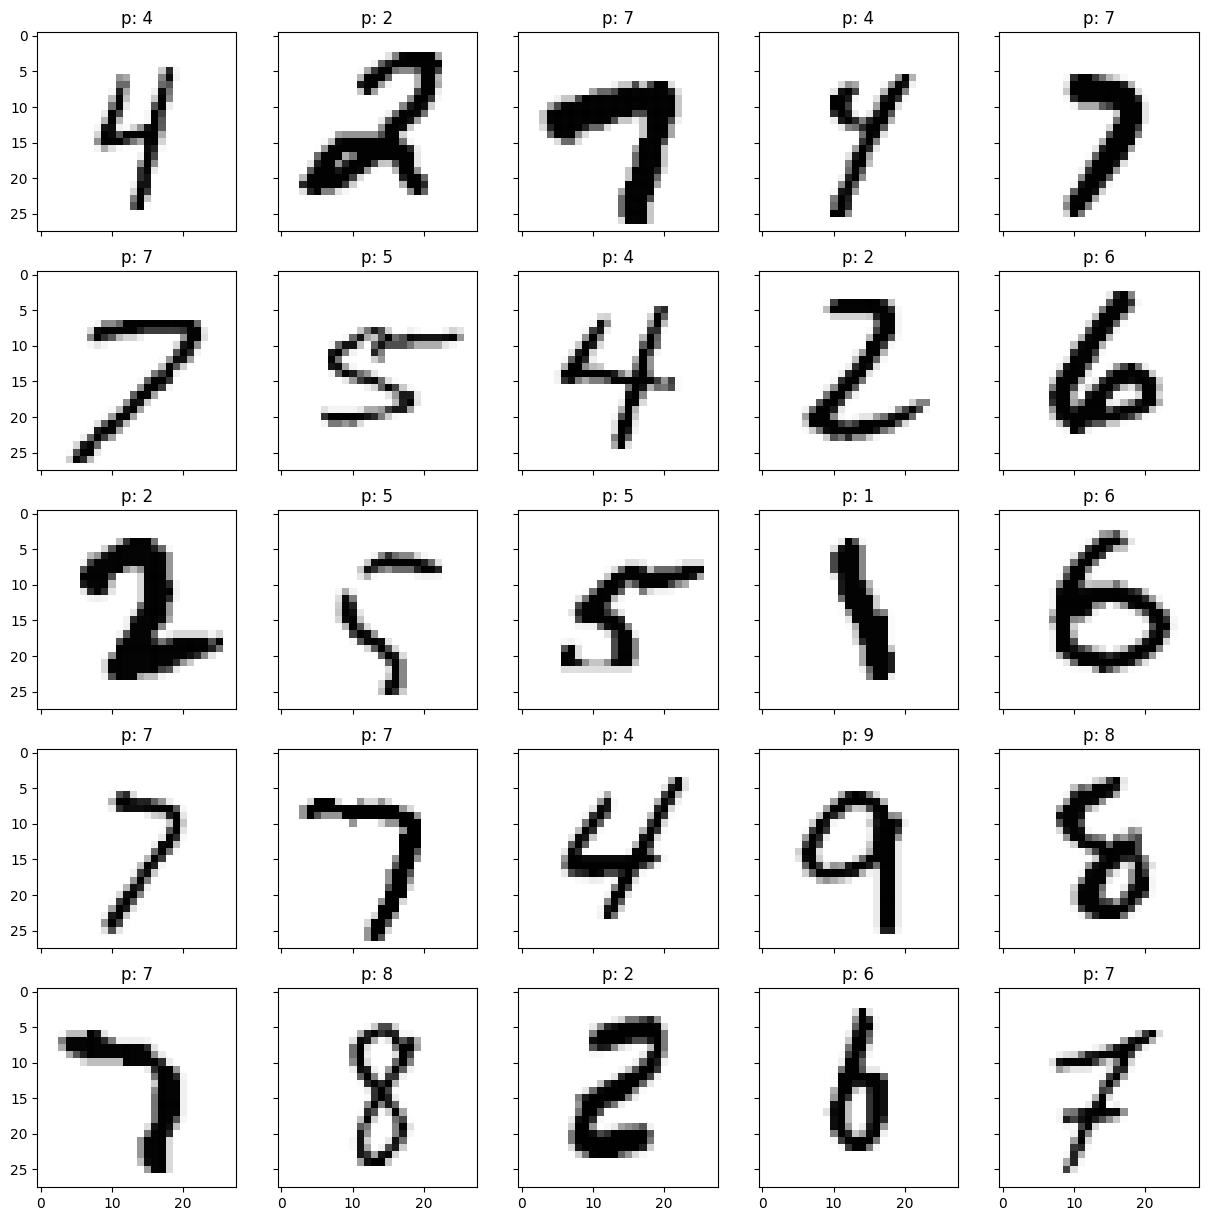

In [34]:
predict(model, X_test, 25,50)